In [158]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon

In [79]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.5)

In [70]:
# load functions
def get_sp_rp_waa():
    df = pd.read_html("https://widgets.sports-reference.com/wg.fcgi?css=1&site=br&url=%2Fleagues%2Fmajors%2F2022.shtml&div=div_team_output")[0].iloc[:-1]
    sp_vect = parse_waa_column(df["SP"])
    rp_vect = parse_waa_column(df["RP"])
    comb_df = pd.DataFrame([sp_vect, rp_vect], index=["SP", "RP"]).T 
    return comb_df.reset_index()

# util funcs
def parse_waa_column(column:pd.Series) -> pd.Series:
    return pd.Series(column.str.slice(3).astype("float64").tolist(),index=column.str.slice(0,3))

In [71]:
df = get_sp_rp_waa()

In [73]:
df.head()

,index,SP,RP
0,LAD,10.4,4.2
1,PHI,7.5,0.0
2,HOU,7.3,1.9
3,NYM,6.6,1.0
4,ATL,6.3,3.6


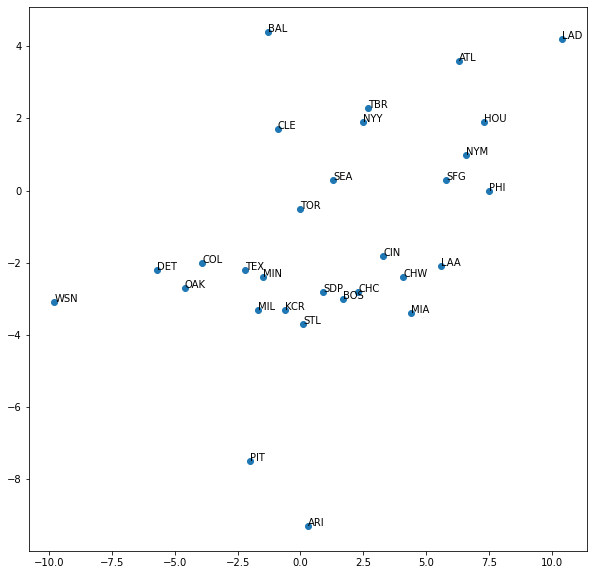

In [76]:
f, ax = plt.subplots(figsize=(10,10))

ax.scatter(df.SP, df.RP)

labels = [
    ax.text(
        x=tm.SP, 
        y=tm.RP,
        s=tm.index
    )
    for tm in df.itertuples()
]

In [77]:
plot_df = df.copy()

In [85]:
plt.xkcd()

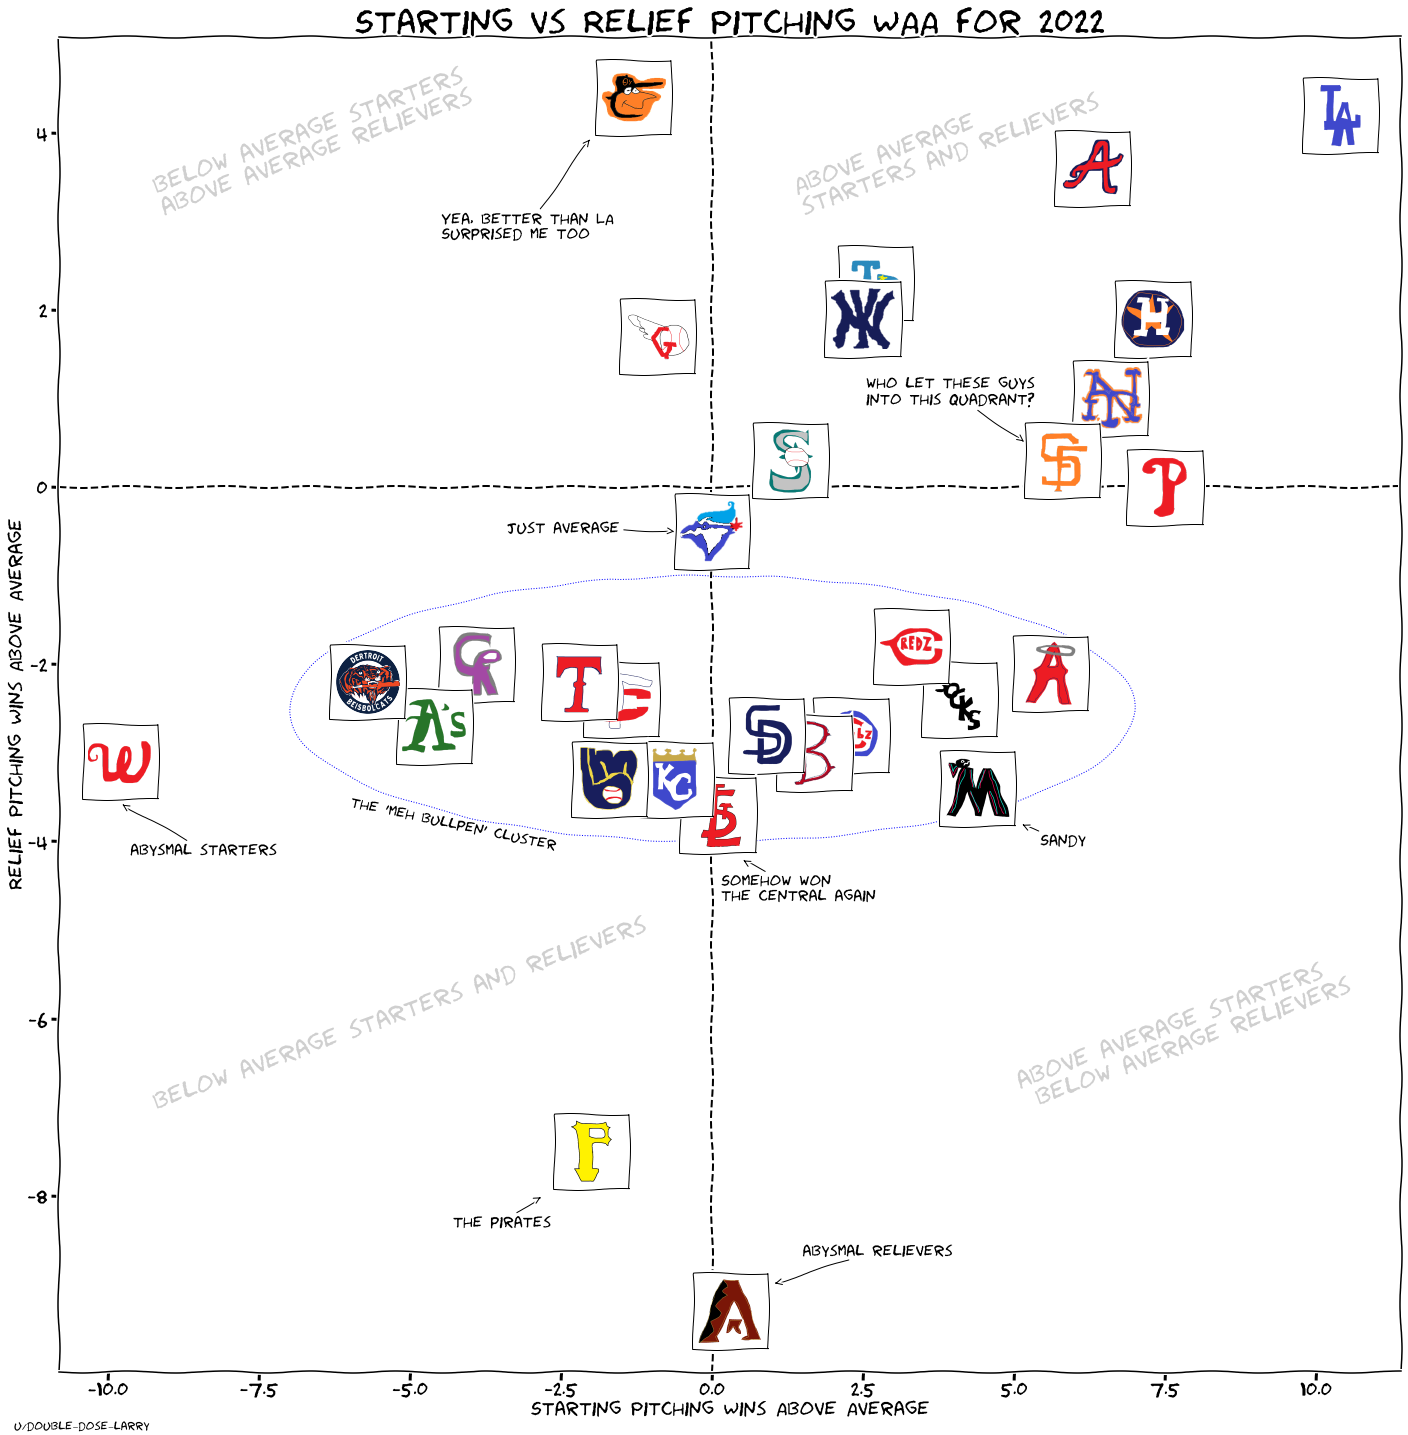

In [179]:
f, ax = plt.subplots(figsize=(20,20))

x = plot_df.SP
y = plot_df.RP

ax.scatter(x,y)

imgs = [
    ax.add_artist(
        AnnotationBbox(getImage(f'{tm.index}.png'),
                      (tm.SP, tm.RP),
                       frameon=True
                      )
    )
    for tm in plot_df.itertuples()
]


# annotate O's
ax.annotate(
    "Yea, better than LA\nSurprised me too",
    (-2,3.95),
    size=16,
    xytext = (-150, -100),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)



# annotate Quadrant II
ax.annotate(
    "below average starters\nabove average relievers",
    (-9.3,3.1),
    size=25,
    rotation=20,
    alpha=.1
#     xytext = (-150, -100),
#         textcoords="offset pixels",
#         arrowprops=dict(
#                      arrowstyle="->")
)

# annotate Quadrant I
ax.annotate(
    "Above average\nstarters and relievers",
    (1.3,3.1),
    size=25,
    rotation=20,
    alpha=.1
#     xytext = (-150, -100),
#         textcoords="offset pixels",
#         arrowprops=dict(
#                      arrowstyle="->")
)
# annotate Quadrant III
ax.annotate(
    "below average starters and relievers",
    (-9.3, -7),
    size=25,
    rotation=20,
    alpha=.1
#     xytext = (-150, -100),
#         textcoords="offset pixels",
#         arrowprops=dict(
#                      arrowstyle="->")
)

# annotate Quadrant IIII
ax.annotate(
    "above average starters\n below average relievers",
    (5,-7),
    size=25,
    rotation=20,
    alpha=.1
#     xytext = (-150, -100),
#         textcoords="offset pixels",
#         arrowprops=dict(
#                      arrowstyle="->")
)


# annotate MIA's
ax.annotate(
    "Sandy",
    (5.1,-3.8),
    size=16,
    xytext = (20, -20),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

# annotate WAS's
ax.annotate(
    "abysmal starters",
    (-9.8,-3.57),
    size=16,
    xytext = (10, -50),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

# annotate ARI's
ax.annotate(
    "abysmal relievers",
    (1,-9),
    size=16,
    xytext = (30, 30),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

# annotate PIT's
ax.annotate(
    "the pirates",
    (-2.8,-8),
    size=16,
    xytext = (-90, -30),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

# annotate TOR's
ax.annotate(
    "Just average",
    (-.58,-.5),
    size=16,
    xytext = (-170, 0),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

# annotate STL's
ax.annotate(
    "Somehow won\nthe central again",
    (.48,-4.2),
    size=16,
    xytext = (-20, -40),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

# annotate SFG's
ax.annotate(
    "who let these guys\ninto this quadrant?",
    (5.2, .5),
    size=16,
    xytext = (-160, 40),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

# annotate meh cluster
ax.add_patch(Ellipse(xy=(0, -2.5), 
                     width=14, 
                     height=3, fill=False, ls=":", lw=1, color="b"))
ax.annotate("the 'meh bullpen' cluster ", (-6,-4.1), size=15, rotation=-12)

# font size
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')
# plt.legend(fontsize='large')
plt.axvline(0, ls="--", c="k")
plt.axhline(0, ls="--", c="k")


# labels
ax.set_xlabel("Starting Pitching Wins Above Average", size=20)
ax.set_ylabel("Relief Pitching Wins Above Average", size=20)

# plt.ylabel("Relief Pitching Wins Above Average", size=30)
plt.title("Starting vs Relief Pitching WAA for 2022", size=35)
plt.tight_layout()
#sign
plt.annotate('u/double_dose_larry',
            xy=(.01, .01), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=12)
plt.savefig('sp_rp_waa_22.png')